'''
【课程3.2.2】  线性回归的python实现方法

线性回归通常是人们在学习预测模型时首选的技术之一。在这种技术中，因变量是连续的，自变量可以是连续的也可以是离散的，回归线的性质是线性的。
线性回归使用最佳的拟合直线（也就是回归线）在因变量（Y）和一个或多个自变量（X）之间建立一种关系

简单线性回归 / 多元线性回归 

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

Text(0.5,1,'线性回归拟合')

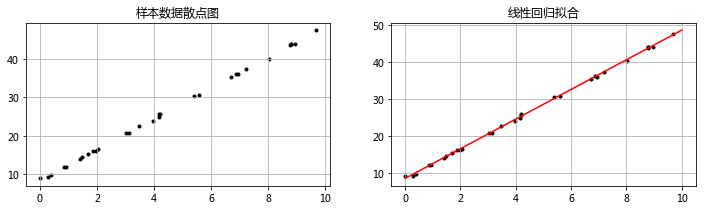

In [6]:
# 简单线性回归（一元线性回归）
# （1）数据示例
from sklearn.linear_model import LinearRegression      # 导入线性回归模块

rng = np.random.RandomState(1)
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4*xtrain + rng.rand(30)
'''
 np.random.RandomState → 随机数种子，对于一个随机数发生器，只要该种子（seed）相同，产生的随机数序列就是相同的
 生成随机数据x与y
 样本关系：y = 8 + 4*x

'''
fig = plt.figure(figsize=(12,3))                       # 生成散点图
ax1 = fig.add_subplot(1,2,1)
plt.scatter(xtrain,ytrain,marker='.',color='k')
plt.grid()
plt.title('样本数据散点图')

model = LinearRegression()                             # LinearRegression → 线性回归评估器，用于拟合数据得到拟合直线
model.fit(xtrain[:,np.newaxis],ytrain)                 # model.fit(x,y) → 拟合直线，参数分别为x与y
                                                       # x[:,np.newaxis] → 将数组变成(n,1)形状

xtest = np.linspace(0,10,10000)                        # 创建测试数据xtest，并根据拟合曲线求出ytest
ytest = model.predict(xtest[:,np.newaxis])             # model.predict → 预测

ax2 = fig.add_subplot(1,2,2)                       
plt.scatter(xtrain,ytrain,marker='.',color='k') 
plt.plot(xtest,ytest,color='r')                        # 绘制散点图、线性回归拟合直线
plt.grid()
plt.title('线性回归拟合')

Text(0.5,1,'误差')

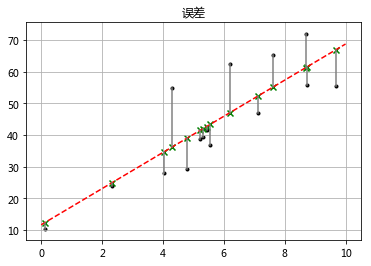

In [9]:
# 简单线性回归（一元线性回归）
# （2）误差

rng = np.random.RandomState(8)                          # 创建样本数据并进行拟合
xtrain = 10 * rng.rand(15)
ytrain = 8 + 4 * xtrain + rng.rand(15) * 30
model.fit(xtrain[:,np.newaxis],ytrain)
xtest = np.linspace(0,10,10000)
ytest = model.predict(xtest[:,np.newaxis])
plt.plot(xtest,ytest,color='r',linestyle='--')          # 拟合直线
plt.scatter(xtrain,ytrain,color='k',marker='.')         # 样本数据散点图
ytest2 = model.predict(xtrain[:,np.newaxis])            # 样本数据x在拟合直线上的y值
plt.scatter(xtrain,ytest2,marker='x',color='g')         # ytest2散点图
plt.plot([xtrain,xtrain],[ytrain,ytest2],color='gray')  # 误差线
plt.grid()
plt.title('误差')

In [11]:
# 简单线性回归（一元线性回归）
# （3）求解a，b

rng = np.random.RandomState(1)
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30)      # 创建数据

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)      # 回归拟合

print(f'斜率a为{model.coef_[0]}')
print(f'截距b为{model.intercept_}')
print('线性回归函数为：\ny = %.4fx + %.4f'%(model.coef_[0],model.intercept_))

斜率a为4.004484137648563
截距b为8.447659499431026
线性回归函数为：
y = 4.0045x + 8.4477


斜率a为30.0000
截距b为0.0000
线性回归函数为：
y = 30.0000x + 0.0000


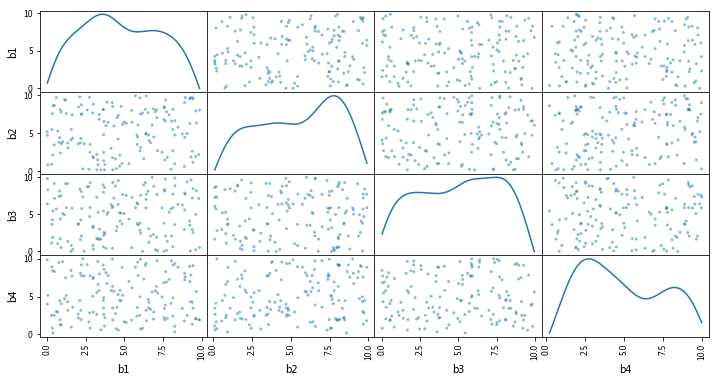

In [18]:
# 多元线性回归
rng = np.random.RandomState(5)
xtrain = 10 * rng.rand(150,4)
ytrain = 20 * np.dot(xtrain,[1.5,2,-4,3])
df = pd.DataFrame(xtrain,columns=['b1','b2','b3','b4'])         # 创建数据，其中包括4个自变量
df['y'] = ytrain                                                # 4个变量相互独立
pd.plotting.scatter_matrix(df[['b1','b2','b3','b4']],         
                  figsize=(12,6),
                  diagonal = 'kde',
                  alpha=0.5,
                  range_padding=0.1)

model = LinearRegression()
model.fit(df[['b1','b2','b3','b4']],df['y'])                    # 多元回归拟合

print('斜率a为%.4f'%model.coef_[0] )
print('截距b为%.4f'%model.intercept_)
print('线性回归函数为：\ny = %.4fx + %.4f'%(model.coef_[0],model.intercept_))

'''
【课程3.2.3】  线性回归模型评估

通过几个参数验证回归模型

SSE(和方差、误差平方和)：The sum of squares due to error
MSE(均方差、方差)：Mean squared error
RMSE(均方根、标准差)：Root mean squared error
R-square(确定系数) Coefficient of determination

'''


In [20]:
# 模型评价
# MSE, RMES, R-square

from sklearn import metrics

rng = np.random.RandomState(1)                     # 创建数据
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30) * 3

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)            # 多元回归拟合

ytest = model.predict(xtrain[:,np.newaxis])       # 求出预测数据
mse = metrics.mean_squared_error(ytrain,ytest)    # 求出均方差
rmse = np.sqrt(mse)                               # 求出均方根

r2 = model.score(xtrain[:,np.newaxis],ytrain)     # 求出确定系数

print('均方差MSE为:%.4f'%mse)
print('均方根RMSE为:%.4f'%rmse)
print('确定系数r-square为:%.4f'%r2)

均方差MSE为:0.7847
均方根RMSE为:0.8858
确定系数r-square为:0.9946
